In [66]:
import pandas as pd

import plotly.express as px
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objects as go

In [53]:
ortg = pd.read_html('https://www.basketball-reference.com/leagues/NBA_stats_per_game.html#stats', header=1)[0]

ortg= ortg.dropna(subset=['ORtg'])
ortg= ortg [['Season','ORtg']]
ortg['Season'] = ortg['Season'].str[:4]
ortg = ortg[ortg['Season']!= 'Seas']
ortg = ortg.dropna()

ortg['Season'] = ortg['Season'].astype(int)
ortg['Season']+=1
ortg

,Season,ORtg
1,2022,112.0
2,2021,112.3
3,2020,110.6
4,2019,110.4
5,2018,108.6
6,2017,108.8
7,2016,106.4
8,2015,105.6
9,2014,106.6
10,2013,105.8


In [3]:
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output, State

import io

<ipython-input-3-0840c16c04ae>:2: UserWarning:


The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`

<ipython-input-3-0840c16c04ae>:3: UserWarning:


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`



In [4]:
import chart_studio.plotly as py
import chart_studio.tools as tls
from ipywidgets import interactive, HBox, VBox



In [5]:
import sys
import pandas as pd

    
def get_table(link_1,link_2):

    df = pd.read_html(link_1)[0]
    df_2 = pd.read_html(link_2)[0]
    df = df.dropna(subset = ['MP'])
    df_2 = df_2.dropna(subset = ['MP','TS%'])
    df = df[df['MP'] != 'MP']
    df_2 = df_2[df_2['MP'] != 'MP']
    final_df = df.merge(df_2)
    final_df['MP'] = final_df['MP'].astype(float)
    final_df['PTS'] = final_df['PTS'].astype(float)
    final_df['TS%'] = final_df['TS%'].astype(float)
    final_df = final_df[final_df['MP'] >300]
    final_df['TS%'] *=100
    final_df = final_df.drop(columns = ['Unnamed: 24','Unnamed: 29','Unnamed: 19'])
    send_df = final_df[['Player','TS%','PTS','MP','Tm']]

    
    return send_df
    
def main(my_dict):
    team = my_dict['team']
    df = get_table()
    return df.to_dict()


In [67]:
link_1 ='https://www.basketball-reference.com/leagues/NBA_2011_per_poss.html#per_poss_stats'
link_2 = 'https://www.basketball-reference.com/leagues/NBA_2011_advanced.html#advanced_stat'

df = pd.read_html(link_1)[0]
df_2 = pd.read_html(link_2)[0]

#df_2 = df_2.dropna()


In [7]:
def get_tables(start_year,stop_year):
    tables = []
    for i in range(start_year,stop_year + 1):
        link_1 ='https://www.basketball-reference.com/leagues/NBA_'+str(i)+'_per_poss.html#per_poss_stats'
        link_2 = 'https://www.basketball-reference.com/leagues/NBA_'+str(i)+'_advanced.html#advanced_stat'

        df = get_table(link_1,link_2)
        tables.append(df)
    return tables


In [8]:
tables = get_tables(2010,2022)

In [9]:
df = tables[0]
df

,Player,TS%,PTS,MP,Tm
0,Arron Afflalo,57.6,16.5,2221.0,DEN
2,LaMarcus Aldridge,53.5,26.1,2922.0,POR
4,Malik Allen,43.1,11.7,456.0,DEN
5,Ray Allen*,60.1,24.2,2819.0,BOS
6,Tony Allen,54.0,19.4,889.0,BOS
...,...,...,...,...,...
570,Dorell Wright,56.7,18.3,1496.0,MIA
571,Julian Wright,51.8,15.4,871.0,NOH
572,Nick Young,51.9,23.6,1421.0,WAS
573,Sam Young,51.8,23.1,1321.0,MEM


In [10]:

teams = list(df['Tm'].unique())

In [11]:
teams

['DEN',
 'POR',
 'BOS',
 'TOT',
 'NJN',
 'MIA',
 'PHO',
 'HOU',
 'ORL',
 'WAS',
 'MEM',
 'DET',
 'CHA',
 'DAL',
 'TOR',
 'MIL',
 'ATL',
 'GSW',
 'SAS',
 'LAC',
 'UTA',
 'PHI',
 'MIN',
 'SAC',
 'NOH',
 'LAL',
 'NYK',
 'OKC',
 'CHI',
 'IND',
 'CLE']

In [12]:
def get_buttons(teams,year):
    my_list = []
    i = 0
    length = len(teams)
    seen = [False for i in range(length+ 1) ]

    seen[i] = True
    my_list.append(dict(label = 'all_teams',

                      args = [{'visible':[i for i in seen]},
                              {'title': 'all_teams',
                               'showlegend':False}]))
    seen[i] = False
    i +=1
    for team in teams:
        #print(i)
        df_team = df[df['Tm'] == team]
        seen[i] = True

        my_list.append(dict(label = team,
                      method = 'update',

                      args = [{'visible':[i for i in seen]},
                              {'title': str(year) + ' '+team,
                               'showlegend':False}]))
        seen[i] = False
        i+=1
    return my_list


In [13]:
zmax = df['TS%'].max()
zmin = df['TS%'].min()
zmin

34.5

In [14]:
def full_trace(fig,df,zmin,zmax,av_shooting):
    fig.add_trace(
            go.Scatter(

                visible = True,
                x = df['PTS'],
                y = df['TS%'],
                customdata = df['TS%'] - av_shooting,

                text = df['Player'],
                hovertemplate =
                '<b>%{text}</b>'+
        '<br><i>Points per 75</i>: %{x:.2f}<br>'+
        'True Shooting: %{y}'
                + ' <br>Relative True Shooting: %{customdata:.2f}<extra></extra></br>'
        ,
                name = 'all_teams',
                marker=dict(
                cmin=zmin ,
                cmax=zmax,
                size=df['MP'] / 65,
                colorbar=dict(
                title="Scoring Efficiency"


            ),
            autocolorscale = True,
            color=  df['TS%'],

        ),


        mode="markers"
            ))
    return fig
    

In [15]:
def team_trace(fig,df,teams,zmin,zmax,av_shooting):
    for team in teams:
        df_team = df[df['Tm'] == team]


        fig.add_trace(
            go.Scatter(
                
                visible = False,
                x = df_team['PTS'],
                y = df_team['TS%'],
                customdata = df_team['TS%'] - av_shooting,
                
                text = df_team['Player'],
                hovertemplate =
                '<b>%{text}</b>'+
        '<br><i>Points per 75</i>: %{x:.2f}<br>'+
        'True Shooting: %{y}'
                + ' <br>Relative True Shooting: %{customdata:.2f}<extra></extra></br>'
        ,
                name = team,
                marker=dict(
                cmin=zmin ,
                cmax=zmax,
                size=df_team['MP'] / 65,
                colorbar=dict(
                title="Scoring Efficiency"


            ),
            autocolorscale = True,
            color=  df_team['TS%'],

        ),


        mode="markers"
            )

        ) 
    return fig

In [16]:
def season_graph(df,year,ortg):
    fig = go.Figure()
    teams = list(df['Tm'].unique())
    my_buttons = get_buttons(teams,year)
    zmax = df['TS%'].max()
    zmin = df['TS%'].min()
    fig.update_layout(
        title={
        'text':year +" Season",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    updatemenus=[go.layout.Updatemenu(
            active=0,
            buttons= my_buttons,
            direction="down",
                pad={"r": 10, "t": 10},
                showactive=True,


    )],
    font=dict(
        size=15,
    )
    )
   
    fig = full_trace(fig,df,zmin,zmax,ortg/2)
    fig = team_trace(fig,df,teams,zmin,zmax,ortg/2)
    fig.update_layout(
        autosize=False,
        width=1000,
        height=800,
    showlegend= False)  

    fig.update_layout(yaxis_range=[int(zmin -3),int(zmax +2)], xaxis_range = [0,50])
    fig.update_yaxes(tickvals=[i for i in range(int(zmin),int(zmax) ,5)], title_text = "True Shooting %",)
    fig.update_xaxes(tickvals = [i for i in range (5,50,5)], title_text = 'Points per 100 Possesions')
    fig.add_hline(y=ortg/2)
    return fig

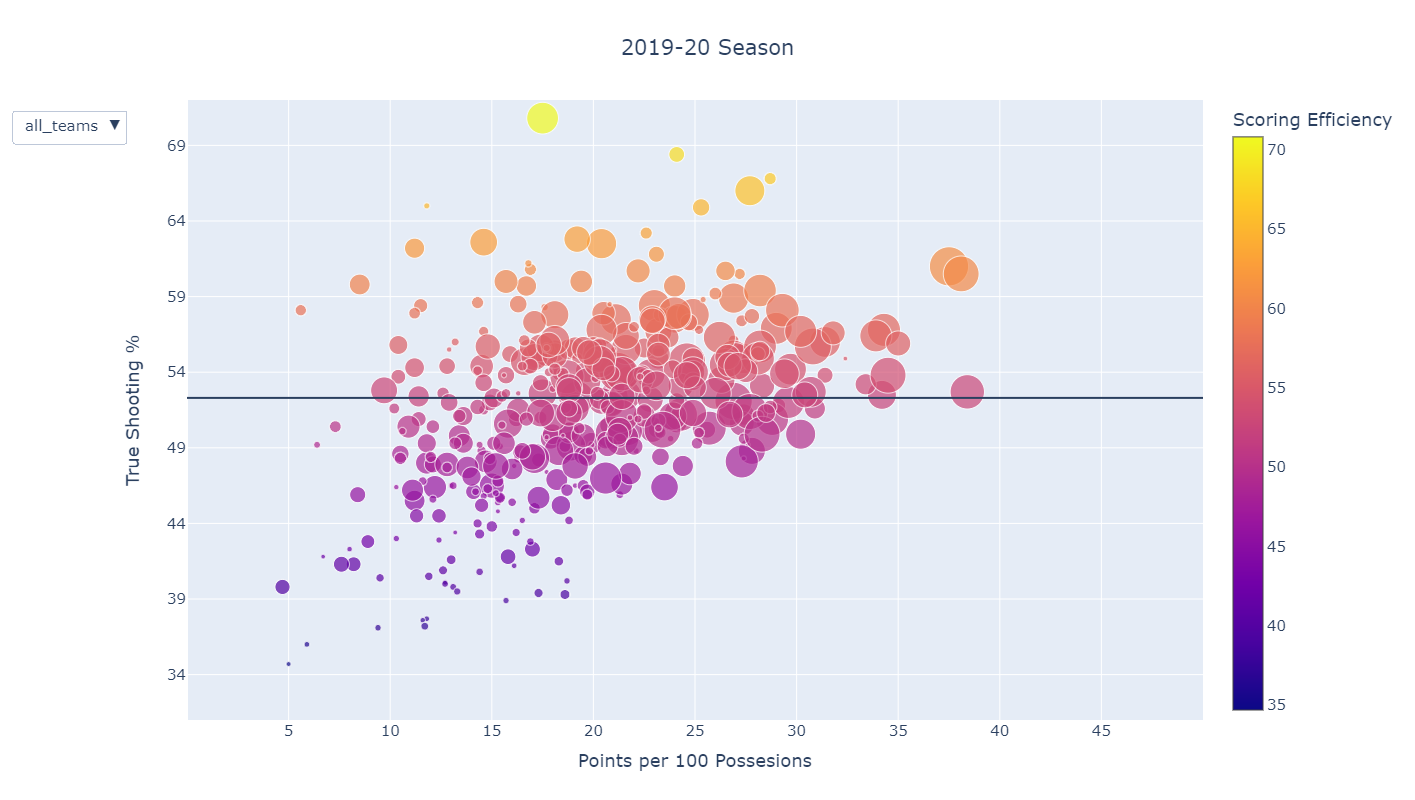

None
made it
None
made it
None
made it
None
made it


In [31]:
fig = season_graph(tables[2],seasons[2],104.6)
fig.show()

In [ ]:
fig.write_html("index.html")

In [34]:
years = [i for i in range(2010,2023)]
options = []
for i in years:
    options.append  ({'label': i, 'value': i})

In [61]:
	
seasons = pd.Series(ortg.ORtg.values,index=ortg.Season).to_dict()

seasons[2022]

'112.0'

In [63]:
seasons[2010]

'107.6'

In [65]:

app = JupyterDash(__name__)
app.layout = html.Div(children=[
    html.H1(children='Scoring by Year', style={'text-align': 'center'}),
    html.Div(children='Player scoring & true shooting', style={'text-align': 'center'}),

    html.Div([
        html.Label(['Choose a season:'],style={'font-weight': 'bold'}),
        dcc.Dropdown(
            id='dropdown',
            options=options,
                
            value=2010,
            style={"width": "60%"}),
        
    html.Div(dcc.Graph(id='graph')),        
        ]),

])

@app.callback(
    Output('graph', 'figure'),
    [Input(component_id='dropdown', component_property='value')]
)

def update_output(value):
    print(value)
    print('made it')
    print(years.index(value))
    print(tables[years.index(value)])
    fig = season_graph(tables[years.index(value)],str(value),float(seasons[value]))
    return fig


# Run app and display result inline in the notebook
if __name__ == '__main__':
    app.run_server(debug=True)

Dash app running on http://127.0.0.1:8050/
2010
made it
0
                Player   TS%   PTS      MP   Tm
0        Arron Afflalo  57.6  16.5  2221.0  DEN
2    LaMarcus Aldridge  53.5  26.1  2922.0  POR
4          Malik Allen  43.1  11.7   456.0  DEN
5           Ray Allen*  60.1  24.2  2819.0  BOS
6           Tony Allen  54.0  19.4   889.0  BOS
..                 ...   ...   ...     ...  ...
570      Dorell Wright  56.7  18.3  1496.0  MIA
571      Julian Wright  51.8  15.4   871.0  NOH
572         Nick Young  51.9  23.6  1421.0  WAS
573          Sam Young  51.8  23.1  1321.0  MEM
574     Thaddeus Young  52.3  22.6  2145.0  PHI

[430 rows x 5 columns]
2010
made it
0
                Player   TS%   PTS      MP   Tm
0        Arron Afflalo  57.6  16.5  2221.0  DEN
2    LaMarcus Aldridge  53.5  26.1  2922.0  POR
4          Malik Allen  43.1  11.7   456.0  DEN
5           Ray Allen*  60.1  24.2  2819.0  BOS
6           Tony Allen  54.0  19.4   889.0  BOS
..                 ...   ...   ...     

In [ ]:
tables[0]